In [1]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("myopia.csv")
target = df.MYOPIC
df.drop(columns=["MYOPIC"], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
df.info()
#perfect data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


/Users/zahero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


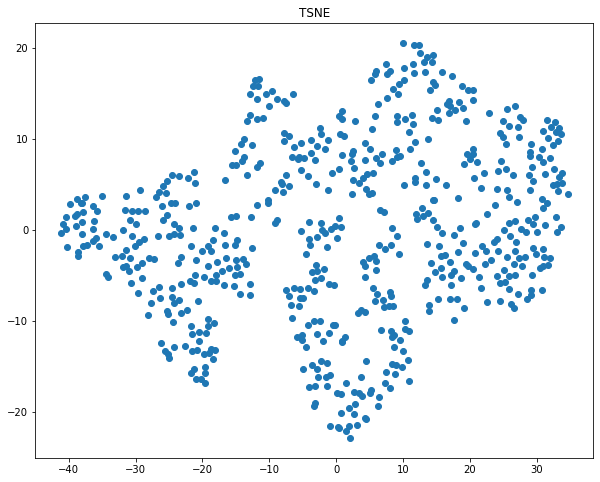

In [17]:
#cluster check
#14 dimensions

X= TSNE(learning_rate = "auto").fit_transform(df)
plt.figure(figsize=(10,8))
plt.title("TSNE")
plt.scatter(X[:,0], X[:,1])
plt.show()





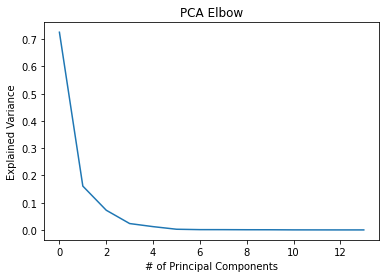

In [5]:
# PCA model
pca = PCA()
pca.fit(df)

plt.plot(range(len(df.columns)), pca.explained_variance_ratio_)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Elbow")
plt.show()
#2-3 components may be good that correlate with explained variance

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

components = pd.DataFrame(pca.transform(df), columns=["PCA1", "PCA2", "PCA3"])

components.head()

,PCA1,PCA2,PCA3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


/Users/zahero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


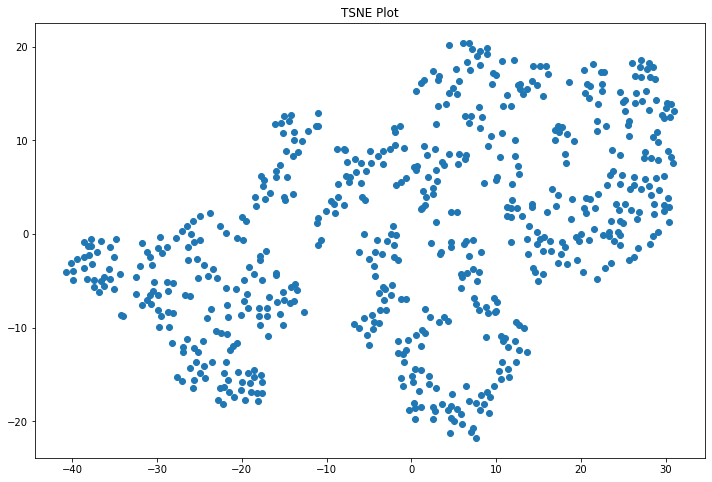

In [7]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(components)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])

plt.title("TSNE Plot")
plt.show()

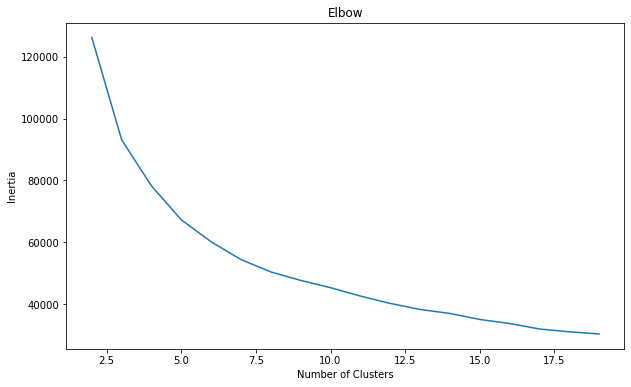

In [8]:
inertia = []

k_range = list(range(2,20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow")

plt.show()

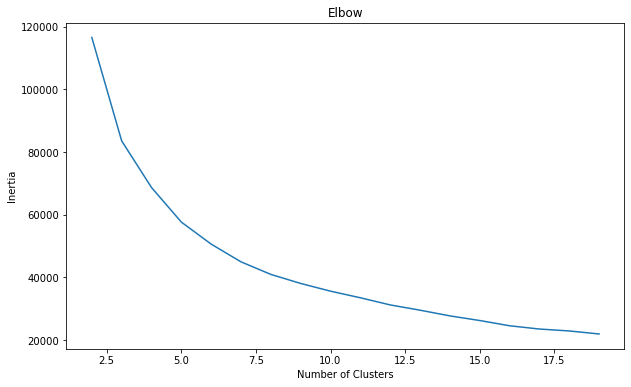

In [9]:
inertia = []
k_range = list(range(2, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(components)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow")

plt.show()

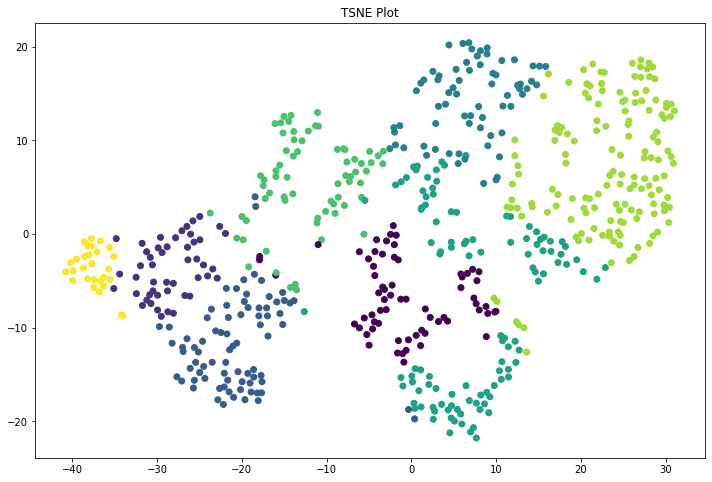

In [10]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c = preds)
plt.title("TSNE Plot")
plt.show()

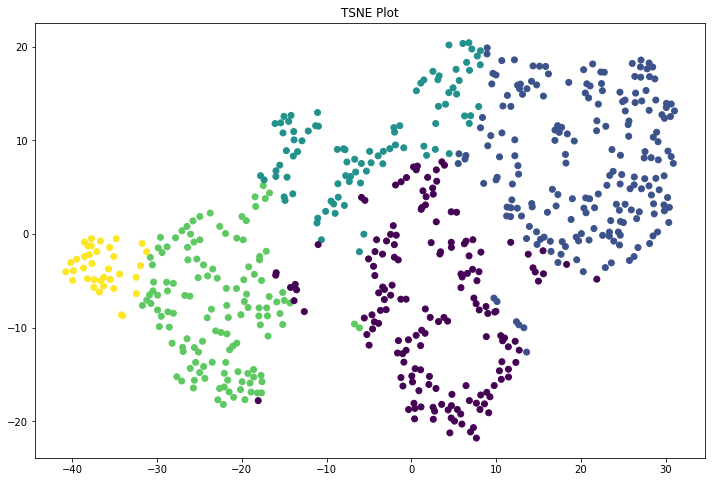

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c = preds)
plt.title("TSNE Plot")
plt.show()

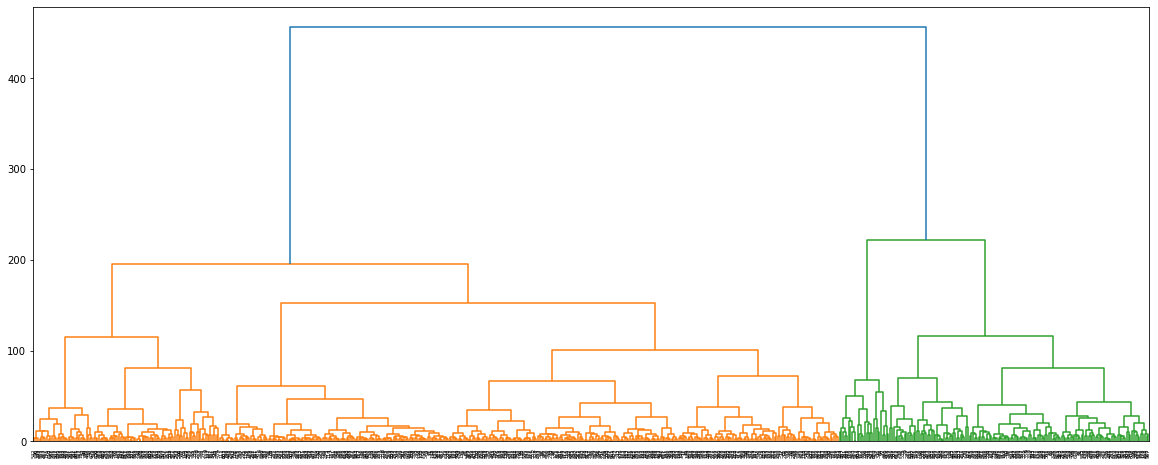

In [12]:
mergings = linkage(df, method="ward")

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

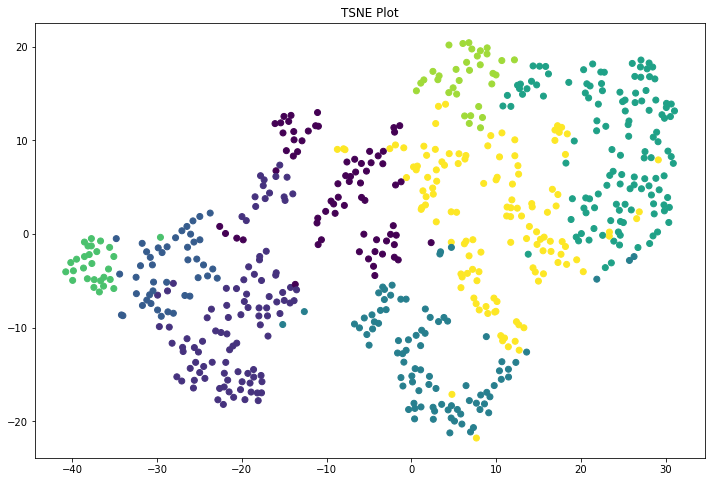

In [13]:
cluster = AgglomerativeClustering(
    n_clusters=8,
    affinity="euclidean",
    linkage="ward"
)

preds = cluster.fit_predict(df)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c = preds)
plt.title("TSNE Plot")
plt.show()

 Yes- kmean of 8 clusters